In [47]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [48]:
data = pd.read_csv(r"C:\Users\Serendipity\Desktop\test_task\ex1data1.txt",names = ['population','profit'])
data.insert(0,"ones",1)
data.head()

,ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


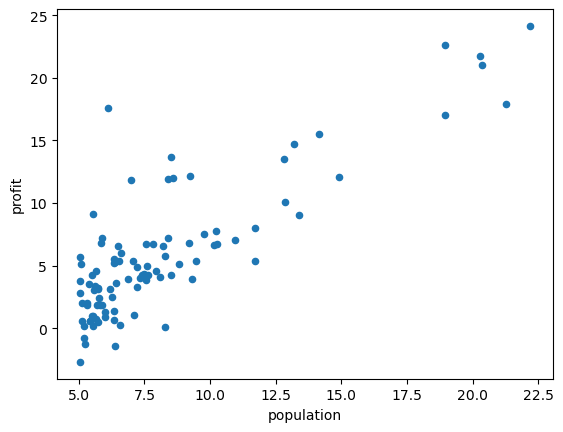

In [49]:
data.plot.scatter('population','profit')
plt.show()

处理数据

In [50]:
x_train = data.iloc[:,0:-1]
y_train = data.iloc[:,-1]

dataframe类型转化为数组类型

In [51]:
x_train = x_train.values
y_train = y_train.values

In [52]:
x_train.shape

(97, 2)

In [53]:

y_train.reshape(len(y_train),1)
y_train.shape

(97,)

In [59]:
def costFunc(x_train,y_train,theta):
    inner =np.power((x_train@theta)-y_train,2)
    return np.sum(inner) / (2*len(x_train))


In [62]:
theta = np.zeros((2,1))
firstCost = costFunc(x_train,y_train,theta)
print(firstCost)

3111.0551861132


In [63]:
def gradDesc(x_train,y_train,theta,alpha,epochs):
    costs = []
    for i in range(epochs):
        theta = theta-(alpha/len(x_train)*x_train.T @ (x_train @ theta-y_train))
        cost = costFunc(x_train,y_train,theta)
        costs.append(cost)


        if (i%100 == 0):
            print(cost)
    return theta,costs



In [64]:
alpha = 0.02
epochs = 1000
theta,costs = gradDesc(x_train,y_train,theta,alpha,epochs)
print(costs)

1612.7657122698495
267.66962685624986
129.98411918902627
63.122108547716536
30.652979859143358
14.885516277308202
7.228615157815174
3.5103167486001667
1.7046589708376716
0.8278062679147571
[1612.7657122698495, 988.1492309998089, 726.4262065008754, 615.4461265694298, 567.0929412658231, 544.7678570512821, 533.269583305233, 526.2842040141317, 521.189142201054, 516.8950057468394, 512.9492060211329, 509.1636491873308, 505.46009915602326, 501.80594965330755, 498.18754738090473, 494.5991118835351, 491.0381334510588, 487.50346164845814, 483.9945113881928, 480.5109331696893, 477.0524761089761, 473.6189310430312, 470.21010689290773, 466.8258208408085, 463.46589424477014, 460.1301509364867, 456.81841650899264, 453.5305180155249, 450.2662838392007, 447.02554363368336, 443.8081282933673, 440.6138699358649, 437.44260188963506, 434.29415868378914, 431.1683760388325, 428.0650908578353, 424.98414121781457, 421.9253663612411, 418.8886066876322, 415.87370374521703, 412.8805002226656, 409.9088399408791, 4

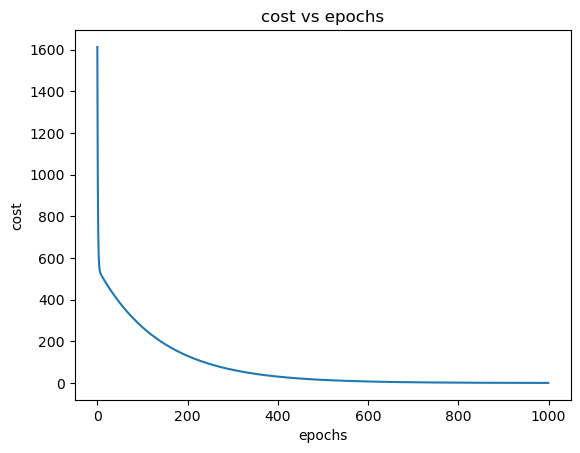

In [73]:
fig,ax = plt.subplots()
ax.plot(np.arange(epochs),costs)
ax.set(xlabel = "epochs",ylabel = "cost",title = "cost vs epochs")
plt.show()

In [75]:
x = np.linspace(y_train.min(),y_train.max(),100)
y = theta[0,0] + x

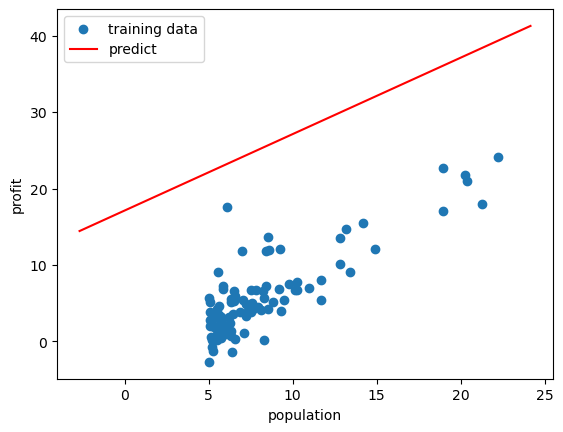

In [80]:
fig,ax = plt.subplots()
ax.scatter(x_train[:,1],y_train,label = "training data")
ax.plot(x,y,'r',label = 'predict')
ax.legend()
ax.set(xlabel = "population",ylabel = "profit")
plt.show()